# EDA
<b>Importing the necessary libraries and dataset<b>

In [152]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
import random
random.seed(42)
warnings.filterwarnings('ignore')

In [153]:
from statsmodels.tsa.stattools import adfuller

In [154]:
sales = pd.read_csv('Dataset/train.csv')

In [155]:
stores = pd.read_csv('Dataset/store.csv')

#### Checking the Stores dataset

In [156]:
stores

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


#### Checking first 5 values in the dataset

In [157]:
sales.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


<b> Checking the basic information ( Non Null data and datatype of the data columns ) </b>

In [158]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


<b> Shape of the dataset. This shows there are 1017209 data points and 9 columns </b>

In [159]:
sales.shape

(1017209, 9)

<b> Basic Description of sales dataset </b>

In [160]:
sales.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [161]:
# # axis = first_store_open.groupby('Month')[['Sales']].mean()
# sales_open = sales[sales['Open'] == 1]
# fig = px.line(sales_open, x = 'Date', y = 'Sales', title = 'Average sales per month', markers = True, color = 'Store')
# fig.show()

# EDA on a specific store ( Store No. 1 )
This is done to get a basic insight of the data as performing on a single is easy compared to whole data

In [162]:
def run_sequence_plot (x, y, title ,  mean_line = False, xlabel="time", ylabel="series"):
    """
    A function that plots a line plot for the given values
    parameters:
        x : Values to be plot in x a-xis
        y : values to plot on y-axis( must be same length to parameter x )
        title : Title  of the plot
        xlabel : Xlabel of the plot
        ylabel: Ylabel of the plot
    returns: y
        Line plot
    """
    plt.figure(figsize =(10 ,7))
    plt.plot(x, y, 'k-', label = ylabel)
    if(mean_line  == True):
        plt.axhline(y=np.nanmean(y), color = "red", label = f'mean(= {np.nanmean(y):.2f} )')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.xticks(rotation=45 , rotation_mode='anchor', ha ='right' )
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid(alpha=0.3);

<b>Selecting the first store for EDA</b> 

In [163]:
print(random.randint(1, 1555))
first_store = sales[sales['Store'] == 1]
first_store.Date= first_store['Date'].astype('datetime64[ns]')

1310


<b>Selecting the days when the stores are open</b>

In [164]:
first_store_open = first_store[first_store['Open'] == 1 ]
first_store.head(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1115,1,4,2015-07-30,5020,546,1,1,0,1
2230,1,3,2015-07-29,4782,523,1,1,0,1
3345,1,2,2015-07-28,5011,560,1,1,0,1
4460,1,1,2015-07-27,6102,612,1,1,0,1
5575,1,7,2015-07-26,0,0,0,0,0,0
6690,1,6,2015-07-25,4364,500,1,0,0,0
7805,1,5,2015-07-24,3706,459,1,0,0,0
8920,1,4,2015-07-23,3769,503,1,0,0,0
10035,1,3,2015-07-22,3464,463,1,0,0,0


### Run Sequence Plot (All Days)
The graph is difficult for analysis due to the effect of holiday sales/customer count being 0. 

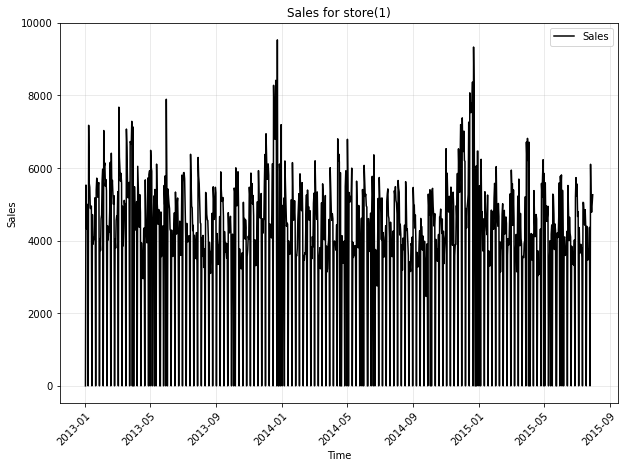

In [165]:
run_sequence_plot(x = first_store['Date'], 
                  y = first_store['Sales'],
                  title = "Sales for store(1)",
                  xlabel = 'Time', ylabel = 'Sales')

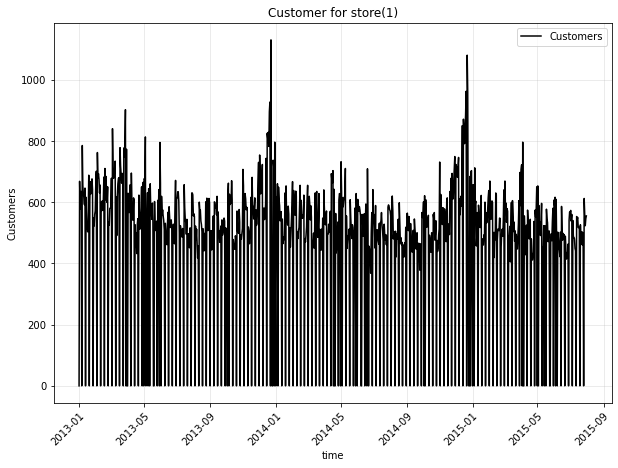

In [166]:
run_sequence_plot(x = first_store['Date'], 
                  y = first_store['Customers'],
                  title = "Customer for store(1)",
                  ylabel = 'Customers')

###  Run Sequence Plot for open days
Checking for the values in the open days shows a clear pattern in data.

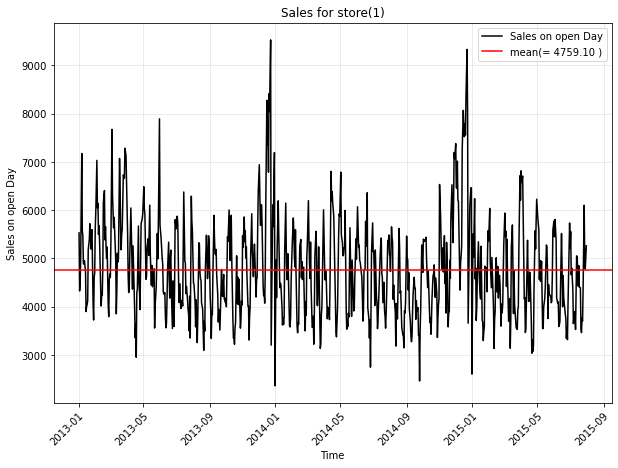

In [167]:
run_sequence_plot(x = first_store_open['Date'], 
                  y = first_store_open['Sales'], 
                  title = "Sales for store(1)", 
                  mean_line = True, xlabel = 'Time', ylabel = 'Sales on open Day')

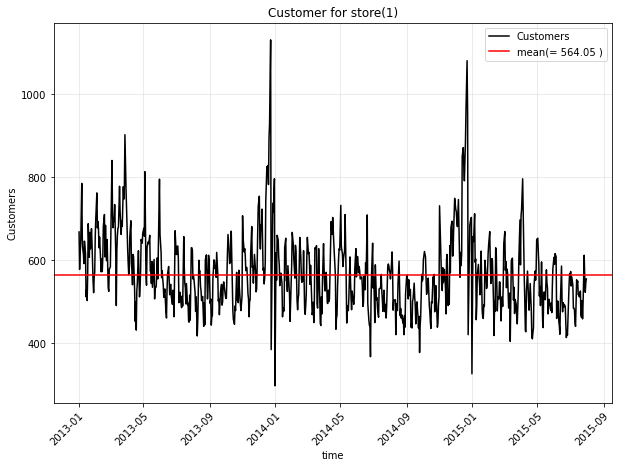

In [168]:
run_sequence_plot(x = first_store_open['Date'],
                  y = first_store_open['Customers'],
                  title = "Customer for store(1)",
                  mean_line = True,
                  ylabel = 'Customers')

Data seems fairly stationary. Validating with the ADF test we get the same result below.

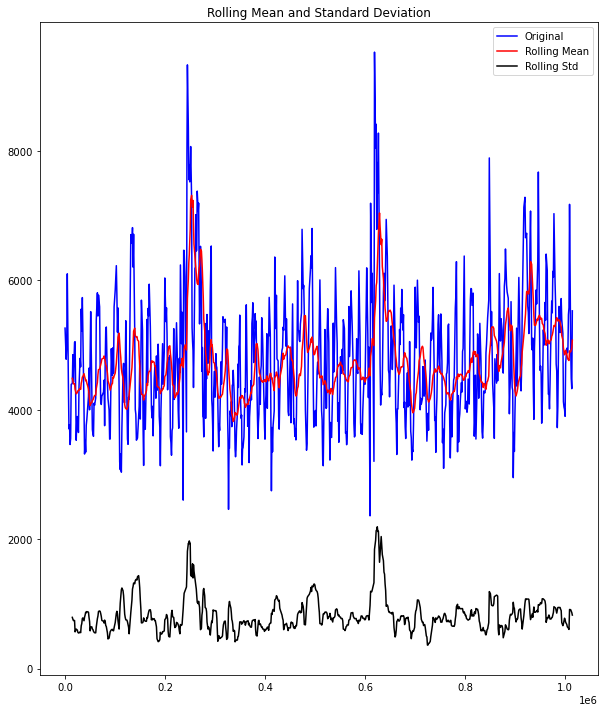

Test Statistics                 -5.412786
p-value                          0.000003
No. of lags used                13.000000
Number of observations used    767.000000
critical value (1%)             -3.438905
critical value (5%)             -2.865316
critical value (10%)            -2.568781
dtype: float64


In [169]:
def check_stationary(df):
  rolling_mean = df.rolling(12).mean()
  rolling_std = df.rolling(12).std()
  #printing the rolling mean and std
  plt.figure(figsize = (10,12))
  plt.plot(df, color='blue',label='Original')
  plt.plot(rolling_mean, color='red', label='Rolling Mean')
  plt.plot(rolling_std, color='black', label = 'Rolling Std')
  plt.legend(loc='best')
  plt.title('Rolling Mean and Standard Deviation')
  plt.show()
  # ADF test
  adf = adfuller(df, autolag='AIC')
 # print(adf) # adf, pvalue, usedlags, nobs, critical_values
  output = pd.Series(adf[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
  for key,values in adf[4].items():
        output['critical value (%s)'%key] =  values
  print(output)
check_stationary(first_store_open['Sales'])

### Check Average Monthly Sales 

In [170]:
first_store_open['Month'] = first_store_open['Date'].dt.month

In [171]:
axis = first_store_open.groupby('Month')[['Sales']].mean()
fig = px.line(axis, x = axis.index, y = 'Sales', title = 'Average sales per month', markers = True)
fig.show()

### Check Average Sales based on Day of the week 
In case of STORE 1 : This shows that the sales are high on first and sixth day of the week and is low in fourth day. On the seventh day of the week the store is closed hence there so sales at all.

In [172]:
axis = first_store.groupby('DayOfWeek')[['Sales']].mean()
fig = px.line(axis, x = axis.index, y = 'Sales', title = 'Average sales per month(Holidays included)', markers = True)
fig.show()

In [173]:
axis = first_store_open.groupby('DayOfWeek')[['Sales']].mean()
fig = px.line(axis, x = axis.index, y = 'Sales', title = 'Average sales per month ( Holidays Excluded )', markers = True)
fig.show()

### Checking the effect of Promo in sales
For STORE 1 : The figure shows there is some effect of Promos in the data

In [174]:
promo_sales = first_store_open.groupby('Promo')[['Sales']].mean().round(2)
fig = px.bar(promo_sales, x= promo_sales.index,y = promo_sales.Sales,
            color = promo_sales.index,  
            width=800, height=600, 
            labels = {'Promo': "Promo", 'value': "Average Sales"}, 
            title = "Effect of Promo in Sales",
            text = 'Sales'
)
fig.update_layout(
    xaxis = dict(
        tickmode = 'array',
        tickvals = [0,1],
        ticktext = ["NO", "YES"]
    )
)
fig.update_coloraxes(showscale=False)
fig.show()

### Checking for effect of school holiday in Sales
We don't seem to have any effect of school holiday in sales

In [175]:
first_store_open['SchoolHoliday'].value_counts()

0    621
1    160
Name: SchoolHoliday, dtype: int64

In [176]:
school_holiday = first_store_open.groupby('SchoolHoliday')[['Sales']].mean().round(2)
fig = px.bar(school_holiday, x= school_holiday.index,y = school_holiday.Sales,
            color = school_holiday.index,  
            width=800, height=600, 
            labels = {'SchoolHoliday': "School Holiday", 'value': "Average Sales"}, 
            title = "Effect of School Holiday in Sales",
            text = 'Sales'
)
fig.update_layout(
    xaxis = dict(
        tickmode = 'array',
        tickvals = [0,1],
        ticktext = ["NO", "YES"]
    )
)
fig.update_coloraxes(showscale=False)
fig.show()

## Heatmap to visualize the correlation of features

Finding the correlation of the features first

In [177]:
first_store[['DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo', 'SchoolHoliday']].corr()

,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
DayOfWeek,1.000000,-0.502143,-0.495904,-0.544070,-0.392929,-0.067935
Sales,-0.502143,1.000000,0.984341,0.889360,0.471333,0.007692
Customers,-0.495904,0.984341,1.000000,0.927965,0.377675,-0.000020
Open,-0.544070,0.889360,0.927965,1.000000,0.299053,-0.000096
Promo,-0.392929,0.471333,0.377675,0.299053,1.000000,0.028374
SchoolHoliday,-0.067935,0.007692,-0.000020,-0.000096,0.028374,1.000000


## Plotting the heatmap
In the figure we can see the sales numbers are highly correlated with the number of customers, Whether the store is open or not and promotions.

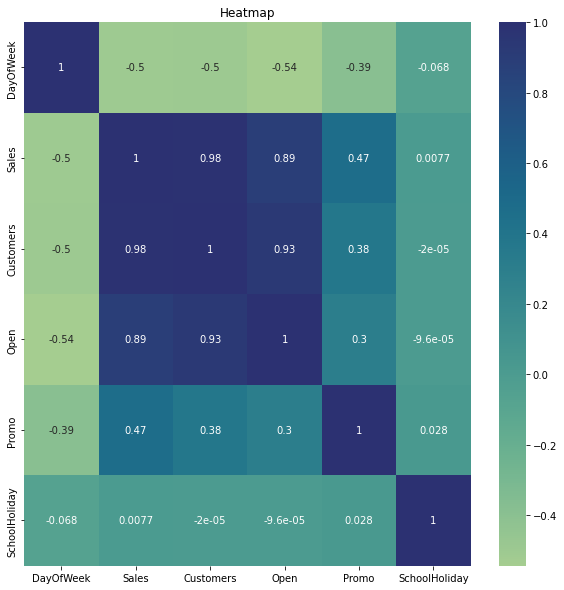

In [178]:
plt.figure(figsize = (10,10))
sns.heatmap(first_store[['DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo', 'SchoolHoliday']].corr(), cmap="crest", annot = True)
plt.title("Heatmap")
plt.show()

#### Checking for the outliers in the data

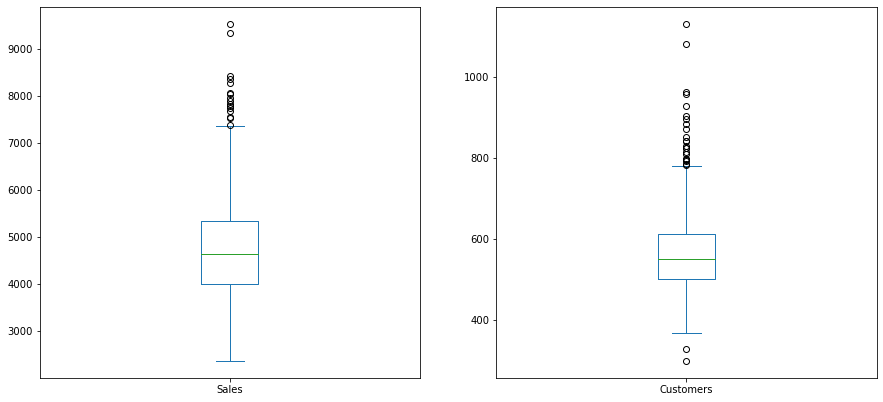

In [179]:
first_store_open.plot(y=['Sales', 'Customers'], 
           kind='box', subplots=True, layout=(2,2), figsize=(15,15))
plt.show()

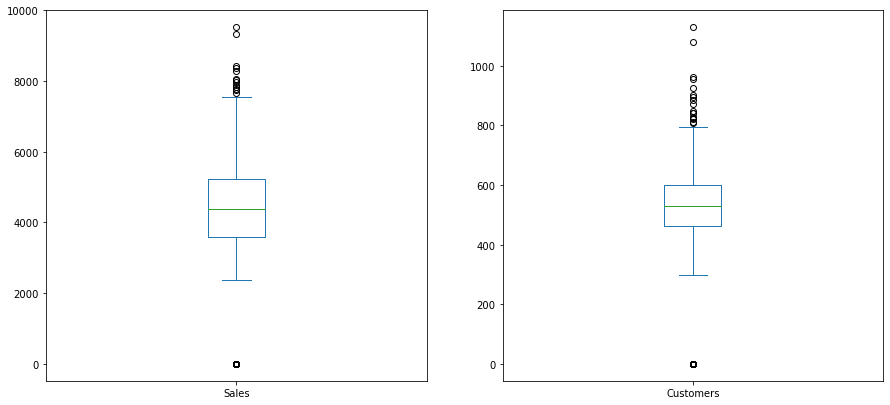

In [180]:
first_store.plot(y=['Sales', 'Customers'], 
           kind='box', subplots=True, layout=(2,2), figsize=(15,15))
plt.show()

#### Checking the density estimation using KDE Plot

<AxesSubplot:xlabel='Sales', ylabel='Density'>

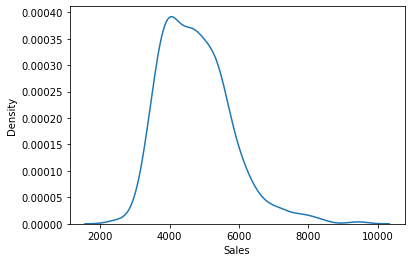

In [181]:
sns.kdeplot(data=first_store_open,x='Sales')

<AxesSubplot:xlabel='Sales', ylabel='Density'>

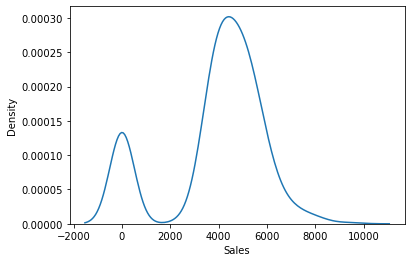

In [182]:
sns.kdeplot(data=first_store,x='Sales')